# Método Simplex

## Un ejemplo

En esta sección introducimos el método simplex via un ejemplo (Vanderbei). Nuestro propósito es maximizar la **función objetivo** $5x_1+4x_2+3x_3$ sujeta a las restricciones siguientes.

$$\begin{array}{lcl}
2x_1+3x_2+x_3 & \leq & 5 \\
4x_1+x_2+2x_3 & \leq &  11\\
3x_1+4x_2+2x_3 & \leq & 8\\
x_1,x_2,x_3 &\geq & 0  
\end{array}$$

Por comodidad, consideraremos los siguientes cambios de variable.

$$
y_1=5-2x_1-3x_2-x_3\\
y_2=11-4x_1-x_2-2x_3\\
y_3=8-3x_1-4x_2-2x_3
$$

No es difícil notar que nuestro problema original es equivalente a maximizar la función $Z=5x_1+4x_2+3x_3$ donde las nuevas variables $y_1,y_2,y_3$ satisfacen las igualdades anteriores y además $x_1,x_2,x_3, y_1,y_2,y_3\geq 0$

El método simplex es una iteración que pude resumirse de la siguiente manera:

1. Empezar con una solución factible, digamos $(x_1,x_2,x_3,y_1,y_2,y_3)$, que satisfaga todas las restricciones.
2. Buscar otra solución que mejore la primera en el sentido de que si $(x'_1,x'_2,x'_3,y'_1,y'_2,y'_3)$ es también solución, entonces el valor de la función objetivo es mayor, es decir, $5x'_1+4x'_2+3x'_3>5x_1+4x_2+3x_3$.
3. Repetimos el procedimiento 1 y 2 hasta encontar la solución óptima.

Empecemos nuestra iteración. Considerando las variables $x_1, x_2$ y $x_3$ como iguales a cero, obtenemos los valores  correspondientes de $y_1$, $y_2$ e $y_3$. Así,

$$x_1=0, x_2=0, x_3=0, y_1=5, y_2=11, y_3=8,$$

es una solución factible. Además, para estos valores, $Z=0$. Para encontrar una segunda solución observemos que si $x_1>0$ y $x_2=x_3=0$, se tiene que $y_1=5-2x_1$. La no negativad de $y_1$ implica que $x_1\leq \frac{5}{2}$. Notamos además que la restricción de no negatividad de $y_2$ implica que $x_1\leq \frac{11}{4}$ mientas que la no negatividad de $y_3$ implica que $x_1\leq \frac{8}{3}$. Puesto que todas estas condiciones tienes que ser satifechas, el valor de $x_1$ no puede exceder la más pequeña de las tres cotas anteriores. En suma $x_1= \frac{5}{2}$, de donde $y_1=5-2(\frac{5}{2})=0$, $y_2=11-4(\frac{5}{2})=1$ y, finalmente, $y_3=8-3(\frac{5}{2})=\frac{1}{2}$. De este modo podemos afirmar que los valores

$$x_1=\frac{5}{2}, x_0=0, x_3=0, y_1=0, y_2=1, y=\frac{1}{2},$$

forman una solución.

## Método Simplex en Excel

Como hemos visto en la sección anterior, la solución óptima que maximiza la función $Z=5x_1+4x_2+3x_3$ está dada por $(x_1,x_2,x_3)=(2,0,1)$, alcanzando $Z$ el valor de $13$. Veamos cómo obtener este mismo resultado con la ayuda de Excel.

En el curso se detallarán los pasos a seguir para resolver nuestro problema. La siguiente imagen muestra la manera de escribir en la hoja de cálculo la función objetivo, las restricciones y cómo debe utilizarse "Solver".

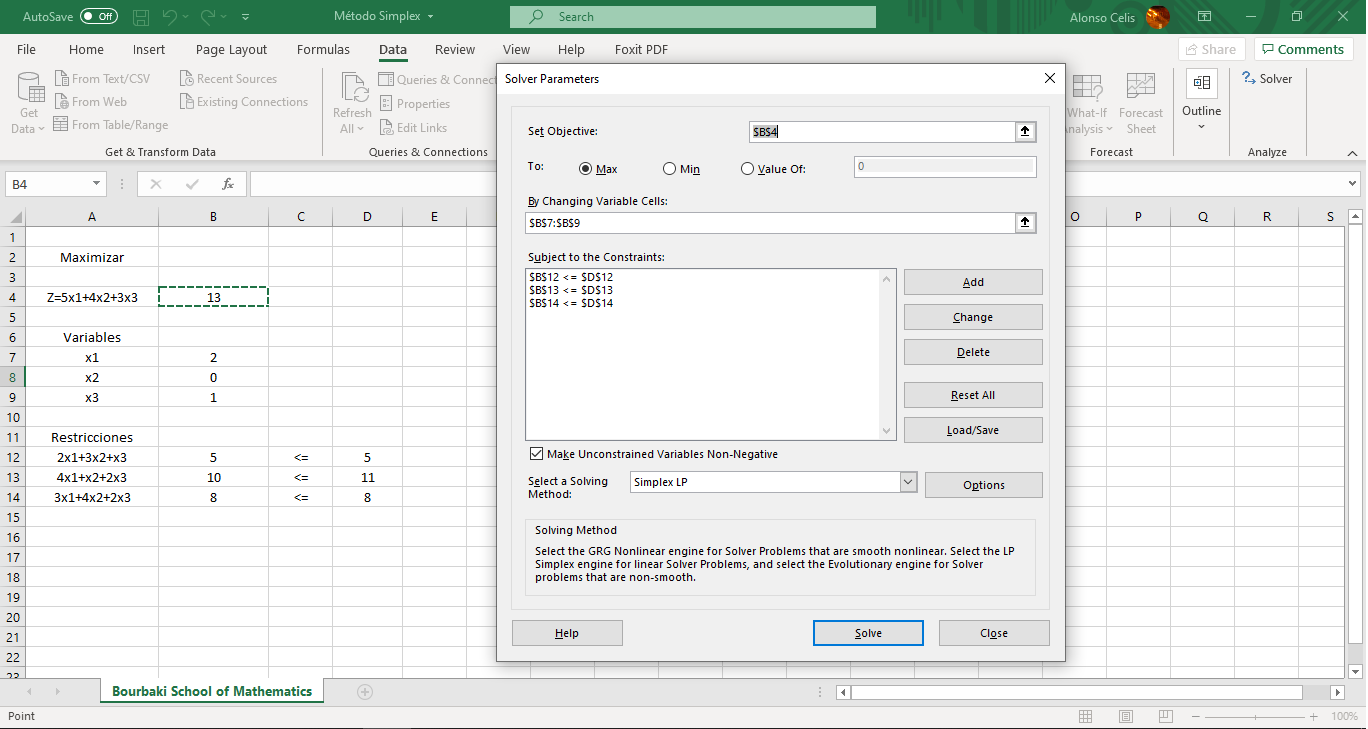

In [1]:
from IPython.display import Image

Image(filename = "C:\AlfonsoEB\simplex.jpg")

Como se puede ver en la imagen de abajo, es posible obtener un resumen del cálculo hecho en Excel.

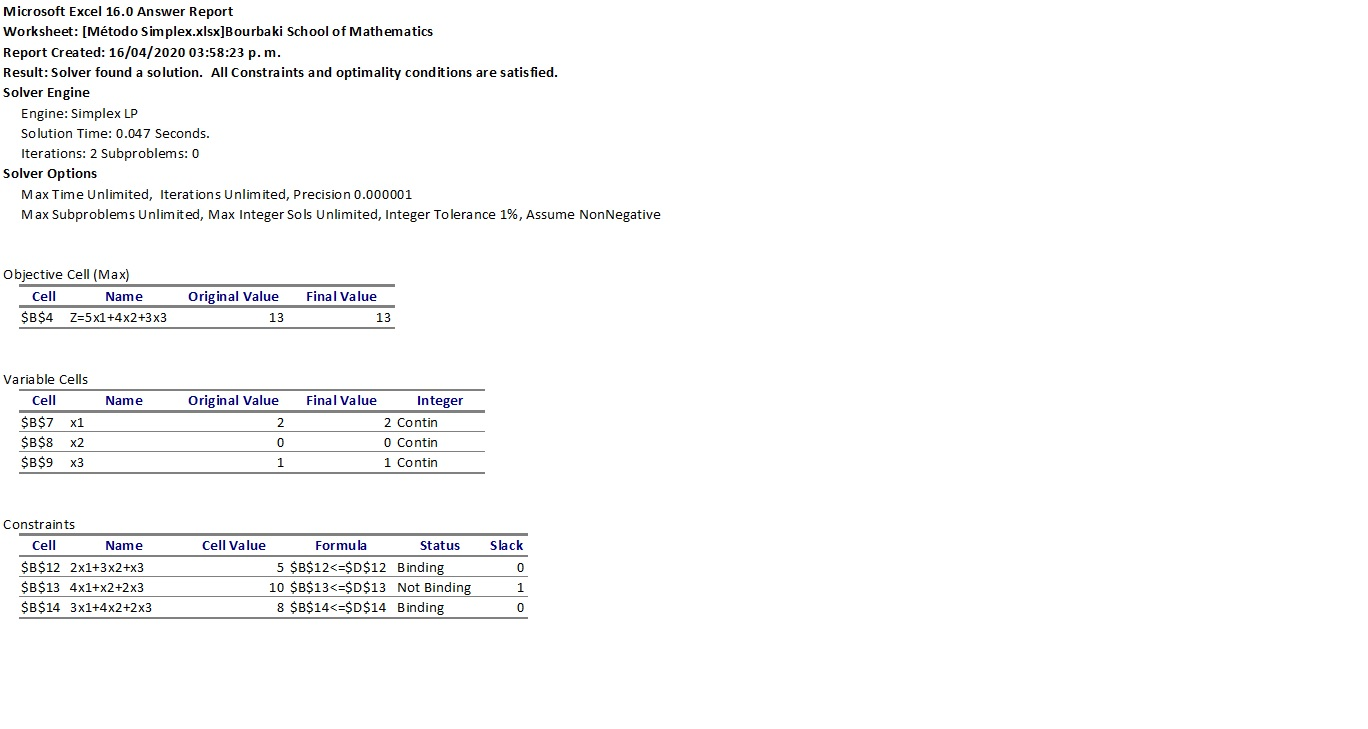

In [2]:
Image(filename = r"C:\AlfonsoEB\respuesta.jpg")

## Método Simplex en Python

Una de las formas más sencillas de utilizar en método simplex en Python es la siguiente.

In [3]:
from pulp import *

In [4]:
prob=LpProblem("ejemplo_max", LpMaximize)
x1 = LpVariable ("x1", lowBound=0) # No negatividad de la variable x1
x2 = LpVariable ("x2", lowBound=0) # No negatividad de la variable x2
x3 = LpVariable ("x3", lowBound=0) # No negatividad de la variable x3
prob += 5*x1+4*x2+3*x3 # Definimos nuestra función objetivo
prob += 2*x1+3*x2+x3 <= 5 # Primera restricción
prob += 4*x1+x2+2*x3 <= 11 # Segunda restricción
prob += 3*x1+4*x2+2*x3 <= 8 # Tercera restricción
prob # Desplegar nuestra problema de maximización

ejemplo_max:
MAXIMIZE
5*x1 + 4*x2 + 3*x3 + 0
SUBJECT TO
_C1: 2 x1 + 3 x2 + x3 <= 5

_C2: 4 x1 + x2 + 2 x3 <= 11

_C3: 3 x1 + 4 x2 + 2 x3 <= 8

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous

In [5]:
status = prob.solve()

In [6]:
LpStatus[status]

'Optimal'

In [7]:
value(x1), value(x2), value(x3) # Imprimimos el valor de nuestra solución óptima

(2.0, 0.0, 1.0)

In [8]:
value(prob.objective) # Finalmente, obtenemos el valor que alcanza la función objetivo evaluada en la solución óptima

13.0